In [2]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

## TF-IDF + 코사인 유사도

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('test.csv', index_col=0)

# TF-IDF 변환기를 초기화
tfidf_vectorizer = TfidfVectorizer()

# 기사의 내용을 벡터로 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(data['content'])

# 코사인 유사도 행렬 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 코사인 유사도 행렬의 크기 확인
print(cosine_sim.shape)

(51, 51)


In [4]:
# 코사인 유사도 행렬 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value

(0.0010214757783344028,
 1.0000000000000038,
 0.08332220902051186,
 0.026815785104675544,
 0.18063643870677099)

In [5]:
# 군집을 저장할 리스트 초기화
clusters = []

# 방문한 기사를 표시하기 위한 배열 초기화
visited = np.zeros(cosine_sim.shape[0], dtype=bool)

# 유사도 행렬을 순회하며 군집 생성
for i in range(cosine_sim.shape[0]):
    if not visited[i]:
        # 현재 기사와 유사도가 0.6보다 높은 기사를 찾는다.
        similar_articles = np.where(cosine_sim[i] > 0.6)[0]
        
        # 해당 기사들을 군집에 추가하고 방문 표시를 한다.
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기 (비어있는 군집을 건너뛴다)
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)

# 각 군집에 포함된 기사의 제목을 저장할 딕셔너리 초기화
clustered_titles = {}

for idx, cluster in enumerate(clusters):
    # 군집 내의 기사 제목들을 리스트로 저장
    titles = data.iloc[cluster]['title'].tolist()
    clustered_titles[f"Cluster {idx + 1}"] = titles

# 첫 5개 군집의 제목을 출력하여 확인
for cluster, titles in list(clustered_titles.items())[:5]:
    print(f"{cluster} (Total: {len(titles)} articles):")
    for title in titles:
        print(f"  - {title}")
    print("\n" + "-"*50 + "\n")

Cluster 1 (Total: 1 articles):
  - 벤처스퀘어 "블록체인과 스타트업 주제 컨퍼런스 14일 개최"

--------------------------------------------------

Cluster 2 (Total: 1 articles):
  - 가상화폐거래소 자금세탁 차단한다

--------------------------------------------------

Cluster 3 (Total: 1 articles):
  - 잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출

--------------------------------------------------

Cluster 4 (Total: 1 articles):
  - 美 CFTC, 비트코인 시세 조작 수사 본격화

--------------------------------------------------

Cluster 5 (Total: 1 articles):
  - 비트코인 `고래` 1600명, 전체 시가총액 1/3 보유

--------------------------------------------------



In [6]:
filtered_data

,time,title,content,press,link,year
0,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018
1,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018
2,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018
3,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018
4,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018
5,2018-06-10 14:07:03,"美, 비트코인 선물 가격 조작 혐의 수사 나서","\r\nCFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해 규...",서울경제,https://n.news.naver.com/mnews/article/011/000...,2018
6,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
7,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018
8,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
9,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018


## KoNLPy + TF-IDF + 코사인 유사도

In [1]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 데이터 로드
data = pd.read_csv('test.csv', index_col=0)

# 형태소 분석기 초기화
okt = Okt()

# 기사의 내용을 형태소로 분석
data['tokenized_content'] = data['content'].apply(lambda x: ' '.join(okt.morphs(x)))

# TF-IDF 변환기를 초기화
tfidf_vectorizer = TfidfVectorizer()

# 형태소 분석된 내용을 벡터로 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(data['tokenized_content'])

# 코사인 유사도 행렬 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value


(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [2]:
def display_clusters_with_titles(clustered_articles, data):
    for key, article_indices in clustered_articles.items():
        print(f"Cluster represented by Article Index {key}:\n")
        for idx in article_indices:
            title = data['title'].iloc[idx]
            content = data['content'].iloc[idx]
            print(f"Title: {title}\n")
            print(f"Content: {content}\n")
            print("="*50)
        print("\n\n")

# display_clusters_with_titles 함수를 사용하여 군집 내용과 제목 출력
# 여기서는 함수만 정의하였으므로 실제 실행 시에는 display_clusters_with_titles(clustered_articles, data)를 호출하면 됩니다.


In [5]:
def cluster_articles_by_similarity(cosine_sim, threshold=0.5):
    clusters = {}
    visited = set()

    for i in range(len(cosine_sim)):
        if i in visited:
            continue
        current_cluster = [i]
        for j in range(i+1, len(cosine_sim)):
            if cosine_sim[i][j] > threshold:
                current_cluster.append(j)
                visited.add(j)
        if len(current_cluster) > 1:
            clusters[i] = current_cluster
            
    return clusters

# 군집화 함수를 사용하여 군집 생성
clustered_articles_indices = cluster_articles_by_similarity(cosine_sim)

# display_clusters_with_titles 함수를 사용하여 군집 내용과 제목 출력
display_clusters_with_titles(clustered_articles_indices, data)


Cluster represented by Article Index 3:

Title: 美 CFTC, 비트코인 시세 조작 수사 본격화

Content: 
			[ 이현일 기자  ] 미 상품선물거래위원회(CFTC)가 가상화폐인 비트코인 시세 조작을 본격 조사하기 시작했다. 월스트리트저널(WSJ)은 CFTC가 최근 주요 가상화폐거래소에 거래 정보 공개 명령을 내렸다며 지난 8일 이같이 보도했다.이번 조치는 시카고상품거래소(CME)의 비트코인 선물가격 조작 관련 수사에서 비롯됐다. 당초 CME는 가상화폐거래소에 금융 사기 방지 등을 위해 거래 정보를 요구했지만, 거래소들은 특정 시간·일부 시장 참가자의 거래 정보만 제공했다. CFTC는 거래소의 정보 공개 거부가 가상화폐시장의 위험성을 조장한다고 판단한 것으로 분석된다. CFTC는 ‘스푸핑(spoofing)’이라는 가상화폐 가격 조작 행위를 눈여겨보는 것으로 알려졌다. 대량의 허위 매수·매도 주문(자전거래 등)을 내서 일반 투자자들이 가상화폐 가격이 오를 것으로 착각하게 만든 뒤 높은 가격에 가상화폐를 팔아넘기는 행위다.가상화폐거래소는 비트코인 가격 조작 행위는 없다고 해명했다. 제스 파월 크라켄 최고경영자(CEO)는 “가격 조작 행위는 거의 수익을 볼 수 없는 일에 엄청난 리스크를 떠안고 뛰어드는 일”이라고 반발했다.이현일 기자 hiuneal@hankyung.com[한경닷컴 바로가기] [글방] [모바일한경 구독신청] ⓒ 한국경제 &amp; hankyung.com, 무단전재 및 재배포 금지
		

Title: 美, 비트코인 선물 가격 조작 혐의 수사 나서

Content: 
CFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해  규제비트코인·이더리움 가격 하락



[서울경제] 미국 연방정부가 비트코인 선물 가격 조작 혐의를 들어 가상화폐 거래소에 정보 공개를 명령한 것으로 알려졌다. 강력한 규제조치에 비트코인·이더리움 등 가상화폐 가격은 일제히 하락했다.월스트리트저널(WSJ)은 미 상품선물거래위원회

In [14]:
# 군집화된 결과를 저장할 DataFrame 초기화
clustered_df = pd.DataFrame(columns=['Cluster_Representative', 'Title', 'Content'])

# 각 군집의 정보를 DataFrame에 추가
for key, article_indices in clustered_articles_indices.items():
    for idx in article_indices:
        title = data['title'].iloc[idx]
        content = data['content'].iloc[idx]
        clustered_df = clustered_df.append({
            'Cluster_Representative': key,
            'Title': title,
            'Content': content
        }, ignore_index=True)

In [ ]:
# DataFrame을 CSV 파일로 저장
csv_path = "cluster_test.csv"
clustered_df.to_csv(csv_path, index=False, encoding='utf-8-sig')

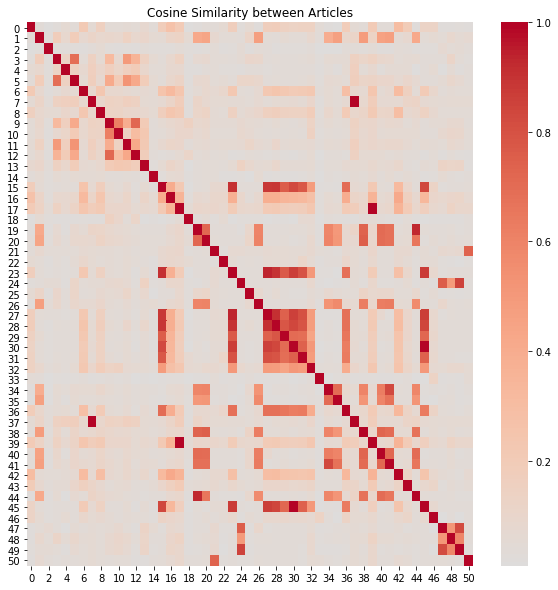

In [15]:
# 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# 코사인 유사도 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(cosine_sim, cmap='coolwarm', center=0)
plt.title("Cosine Similarity between Articles")
plt.show()

In [9]:
# 군집화
clusters = []
visited = np.zeros(cosine_sim.shape[0], dtype=bool)
for i in range(cosine_sim.shape[0]):
    if not visited[i]:
        similar_articles = np.where(cosine_sim[i] > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)
filtered_data

,time,title,content,press,link,year,tokenized_content
0,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018,\r\n\t\t\t 서 울 창업 허브 에서 10회 ' GSC ' 행사 ... 비트코...
1,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018,"\r\n FIU , 직접 감독 대상 에 포함 대부 업체 도 돈세탁 고리 차단 … 변..."
2,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018,\r\n\r\n\r\n\r\n\r\n 올해 초 기승 을 부린 뒤 자취 를 감췄던 매...
3,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018,\r\n\t\t\t [ 이현일 기자 ] 미 상품 선물거래 위원회 ( CFTC ) 가...
4,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018,\r\n\t\t\t 가상 화폐 의 ' 큰손 ' 을 뜻 하는 소수 의 ' 고래 ( w...
5,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"\r\n 디지털 시민권 에 블록 체인 적용 … 中 대학생 , 이 더 리움 으로 ' ..."
6,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018,\r\n\t\t\t 암호 화폐 시장 규제 가 좀 더 확실해지면 기관 투자가 자금 ...
7,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,\r\n [ 박영숙 의 미래 여행 ] \r\n\r\n\r\n\r\n ( 서울 = 뉴...
8,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,\r\n\r\n\r\n\r\n\r\n WSJ 갈무리 ( 서울 = 뉴스 1 ) 박 형...
9,2018-06-10 11:43:12,"美규제당국, 가상통화 가격조작 조사 속도‥시장 영향은?","\r\n미 상품선물거래위원회, 비트코인 거래소에 거래정보 제공 요구\r\n\r\n\...",아시아경제,https://n.news.naver.com/mnews/article/277/000...,2018,"\r\n 미 상품 선물거래 위원회 , 비트코인 거래소 에 거래 정보 제공 요구 \r..."


In [ ]:
filtered_data.to_csv('filtered_test.csv', encoding='utf-8-sig', index=False)

## 자카드 유사도

In [17]:
import pandas as pd
from konlpy.tag import Okt
import numpy as np

# 데이터 로드
data = pd.read_csv('test.csv', index_col=0)


# 형태소 분석기 초기화
okt = Okt()

# 기사의 내용을 형태소로 분석하여 집합으로 변환
data['tokenized_content'] = data['content'].apply(lambda x: set(okt.morphs(x)))

def jaccard_similarity(set1, set2):
    """자카드 유사도 계산 함수"""
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# 유사도 행렬 초기화
similarity_matrix = []

for i in range(len(data)):
    row = []
    for j in range(len(data)):
        # 자카드 유사도 계산
        similarity = jaccard_similarity(data['tokenized_content'].iloc[i], data['tokenized_content'].iloc[j])
        row.append(similarity)
    similarity_matrix.append(row)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value


(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [18]:
# 군집화
clusters = []
visited = np.zeros(len(data), dtype=bool)
for i in range(len(data)):
    if not visited[i]:
        similar_articles = np.where(np.array(similarity_matrix[i]) > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)


filtered_data


,time,title,content,press,link,year,tokenized_content
0,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018,"{명칭, 타임, in, 프로젝트, 경제, 선, 나서, 말, 조, 개발, 네이버, 크..."
1,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018,"{특정, 회의, 대법원, 의원, 경제, 정책, 선, 일본, 된다, 종사, 문제, 배..."
2,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018,"{부린, 요구, 말, Command, 된다, 배포, ”, 본, 기승, Copyrig..."
3,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018,"{특정, 경제, 알려졌다, 요구, 된다, 선물, 배포, 없다고, ”, 시세, 신청,..."
4,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018,"{비중, 배포, 하지만, 널리, 몇몇, 강조, ~, 는, 세, 뉴스, 10만, 있다..."
5,2018-06-10 14:07:03,"美, 비트코인 선물 가격 조작 혐의 수사 나서","\r\nCFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해 규...",서울경제,https://n.news.naver.com/mnews/article/011/000...,2018,"{특정, 경제, 알려졌다, 요구, 된다, 선물, 배포, 없다고, ”, 울, 내놓는,..."
6,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"{운동, 5000, 정치, 비, 서비스, 신, 본, 범, 는, 있다, 낙후, 여, ..."
7,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018,"{질문, 주장, 하다, 말, 배포, 서비스, 감, ”, 강조, 자체, 하나, ※, ..."
8,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"{허용, 스위프트, 주장, 식별, 서비스, 여러, Philippines, ~, 는,..."
9,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018,"{©, 알려졌다, 된다, 선물, 배포, 했으며, 대한, 이번, 3.56%, 벌이, ..."


## sBERT 사용 + DBSCAN

In [31]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
import numpy as np

# 1. 데이터 로드
data = pd.read_csv('test.csv')

# 2. sBERT를 사용하여 문장 임베딩 생성 및 문서 임베딩 평균 계산
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')  # KOBERT를 사용하려면 적절한 모델명으로 변경

def split_into_sentences(text):
    return text.split('.')  # 더 정교한 문장 분할이 필요할 경우 변경

embeddings = []
for content in data['content']:
    sentences = split_into_sentences(content)
    sentence_vectors = model.encode(sentences)
    doc_vector = np.mean(sentence_vectors, axis=0)
    embeddings.append(doc_vector)

# 3. 유사도 행렬 생성 및 음수 값 처리
similarity_matrix = cosine_similarity(embeddings)
similarity_matrix[similarity_matrix < 0] = 0
distance_matrix = 1 - (similarity_matrix + 1) / 2
distance_matrix[distance_matrix < 0] = 0


,date,time,title,content,press,link,year
0,2018-06-10,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018


In [34]:

# 4. DBSCAN을 사용한 군집화
dbscan = DBSCAN(eps=0.4, min_samples=2, metric='precomputed')
clusters = dbscan.fit_predict(distance_matrix)

# 5. 각 군집에서 대표 기사 선택
representative_idx = []
for label in set(clusters):
    if label != -1:
        indices = np.where(clusters == label)[0]
        representative = indices[0]
        representative_idx.append(representative)

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_idx].reset_index(drop=True)
filtered_data

,date,time,title,content,press,link,year
0,2018-06-10,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018


## sBERT + cosine유사도

In [20]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np

# 데이터 로드
data = pd.read_csv('test.csv')

# sBERT 모델 로드
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

# 각 기사의 내용을 임베딩
embeddings = model.encode(data['content'].tolist(), convert_to_tensor=True)

# 코사인 유사도 계산 함수
def cosine_similarity(embedding1, embedding2):
    return util.pytorch_cos_sim(embedding1, embedding2)

# 유사도 행렬 초기화
similarity_matrix = []

for i in range(len(data)):
    row = []
    for j in range(len(data)):
        similarity = cosine_similarity(embeddings[i], embeddings[j]).item()
        row.append(similarity)
    similarity_matrix.append(row)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value

(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [32]:
# 군집화
clusters = []
visited = np.zeros(len(data), dtype=bool)
for i in range(len(data)):
    if not visited[i]:
        similar_articles = np.where(np.array(similarity_matrix[i]) > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)
filtered_data

,date,time,title,content,press,link,year
0,2018-06-10,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018
1,2018-06-10,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018
2,2018-06-10,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018
3,2018-06-10,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018
4,2018-06-10,2018-06-10 07:01:05,"가상화폐 '제도화' 뛰어든 해외, 기준조차 없는 한국","\r\n""블록체인-가상화폐 분리불가…'베니스의 상인'과 유사""""정부는 규제라도 해달...",한국경제언론사 선정,https://n.news.naver.com/mnews/article/015/000...,2018
5,2018-06-10,2018-06-10 11:55:00,[이주의 비트코인]'51% 공격'에 가격 '뚝'…잡코인 옥석가리기,"\r\n'51% 공격' 당한 가상통화 가격, 계단식 하락 계속 거래소, 기반 취약한...",아시아경제,https://n.news.naver.com/mnews/article/277/000...,2018
6,2018-06-10,2018-06-10 11:55:00,[이주의 비트코인]'51% 공격'에 가격 '뚝'…잡코인 옥석가리기,"\r\n'51% 공격' 당한 가상통화 가격, 계단식 하락 계속 거래소, 기반 취약한...",아시아경제,https://n.news.naver.com/mnews/article/277/000...,2018
7,2018-06-10,2018-06-10 10:00:00,"LG CNS, 조폐공사 블록체인 플랫폼 구축 수주...""공공 분야 국내 최초""","\r\nLG CNS, 한국조폐공사의 '블록체인 오픈 플랫폼 구축' 사업 수주클라우드...",뉴시스,https://n.news.naver.com/mnews/article/003/000...,2018


## Levenshtein

In [23]:
import pandas as pd
import numpy as npa
import Levenshtein as lev

# 데이터 로드
data = pd.read_csv('test.csv')

# Restricted Damerau-Levenshtein 거리 계산 함수
def restricted_damerau_levenshtein(str1, str2):
    return lev.distance(str1, str2)

# 유사도 행렬 초기화
similarity_matrix = []

for i in range(len(data)):
    row = []
    for j in range(len(data)):
        # Restricted Damerau-Levenshtein 거리 계산
        distance = restricted_damerau_levenshtein(data['content'].iloc[i], data['content'].iloc[j])
        # 유사도는 1에서 거리를 뺀 값으로 계산 (거리가 0이면 완벽하게 일치)
        similarity = 1 - (distance / max(len(data['content'].iloc[i]), len(data['content'].iloc[j])))
        row.append(similarity)
    similarity_matrix.append(row)

# 행렬의 통계 값 계산
min_value = np.min(cosine_sim)
max_value = np.max(cosine_sim)
mean_value = np.mean(cosine_sim)
median_value = np.median(cosine_sim)
std_value = np.std(cosine_sim)

min_value, max_value, mean_value, median_value, std_value

(0.007911945298868595,
 1.0000000000000018,
 0.1398855506674582,
 0.05894596393279426,
 0.2162055001748463)

In [24]:
# 군집화
clusters = []
visited = np.zeros(len(data), dtype=bool)
for i in range(len(data)):
    if not visited[i]:
        similar_articles = np.where(np.array(similarity_matrix[i]) > 0.6)[0]
        clusters.append(similar_articles)
        visited[similar_articles] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)

filtered_data


,date,time,title,content,press,link,year
0,2018-06-10,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018
1,2018-06-10,2018-06-10 18:14:04,가상화폐거래소 자금세탁 차단한다,"\r\nFIU, 직접 감독대상에 포함대부업체도 돈세탁 고리 차단…변호사·회계사도 신...",A15면 2단,https://n.news.naver.com/mnews/article/009/000...,2018
2,2018-06-10,2018-06-10 16:00:08,"잠잠했던 '매그니베르' 랜섬웨어, 파일리스 형태로 재등장...피해속출",\r\n\r\n\r\n\r\n\r\n올해 초 기승을 부린 뒤 자취를 감췄던 매그니베...,13면 3단,https://n.news.naver.com/mnews/article/030/000...,2018
3,2018-06-10,2018-06-10 15:30:03,"美 CFTC, 비트코인 시세 조작 수사 본격화",\r\n\t\t\t[ 이현일 기자 ] 미 상품선물거래위원회(CFTC)가 가상화폐인...,A15면 3단,https://n.news.naver.com/mnews/article/015/000...,2018
4,2018-06-10,2018-06-10 17:30:03,"비트코인 `고래` 1600명, 전체 시가총액 1/3 보유",\r\n\t\t\t가상화폐의 '큰손'을 뜻하는 소수의 '고래(whale)'들이 비트...,A14면 1단,https://n.news.naver.com/mnews/article/009/000...,2018
5,2018-06-10,2018-06-10 14:07:03,"美, 비트코인 선물 가격 조작 혐의 수사 나서","\r\nCFTC, 거래소에 정보 제출 영장 발부스푸핑 등 가격 조작 엄단 위해 규...",서울경제,https://n.news.naver.com/mnews/article/011/000...,2018
6,2018-06-10,2018-06-10 07:00:00,[코인핫클립]신흥국에 불고 있는 블록체인 혁명,"\r\n디지털시민권에 블록체인 적용…中 대학생, 이더리움으로 '미투 운동'\r\n\...",뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
7,2018-06-10,2018-06-10 12:46:04,"월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”",\r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...,파이낸셜뉴스,https://n.news.naver.com/mnews/article/014/000...,2018
8,2018-06-10,2018-06-10 09:56:44,블록체인 기술만 있으면 '해외송금' 하루 만에 가능,\r\n[박영숙의 미래여행]\r\n\r\n\r\n\r\n(서울=뉴스1) 박영숙 세계...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018
9,2018-06-10,2018-06-10 09:46:35,비트코인 등 암호화폐 일제 하락 이유는?,\r\n\r\n\r\n\r\n\r\nWSJ 갈무리(서울=뉴스1) 박형기 기자 = 미...,뉴스1,https://n.news.naver.com/mnews/article/421/000...,2018


## DBSCAN +코사인+ TF-IDF

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 로드
data = pd.read_csv('test.csv')

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['content'])

# 코사인 유사도를 기반으로 DBSCAN 클러스터링
# min_samples는 각 군집에 필요한 최소 샘플 수입니다.
# 이 값을 2로 설정하면 최소 두 개의 유사한 기사가 있어야 군집을 형성합니다.
dbscan = DBSCAN(eps=0.4, min_samples=2, metric='cosine')
clusters = dbscan.fit_predict(tfidf_matrix)

# 각 군집에서 대표 기사 선택
unique_clusters = set(clusters)
representative_indices = []

for cluster in unique_clusters:
    if cluster != -1:  # -1은 노이즈 포인트를 나타냅니다.
        indices = [index for index, value in enumerate(clusters) if value == cluster]
        representative_indices.append(indices[0])

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)

print(filtered_data)


         date                 time                             title  \
0  2018-06-10  2018-06-10 12:46:04  월가 암호화폐 왕 “규제 확실성, 기관투자가 진입 기폭제”   
1  2018-06-10  2018-06-10 10:48:07     LG CNS, 조폐공사 블록체인 플랫폼 구축사업 수주   
2  2018-06-10  2018-06-10 07:01:05     가상화폐 '제도화' 뛰어든 해외, 기준조차 없는 한국   
3  2018-06-10  2018-06-10 12:01:05       암호화폐 취급업소 AML 체계 감독대상에 포함된다   
4  2018-06-10  2018-06-10 13:26:03   거래소 코인레일, 해킹공격 발생으로 '긴급 시스템 점검'   
5  2018-06-10  2018-06-10 14:01:10   전자금융업·대부업·변호사에 ‘돈세탁방지 의무’ 부과 검토   

                                             content       press  \
0  \r\n\t\t\t 암호화폐 시장 규제가 좀 더 확실해지면 기관투자가 자금이 물 밀...      파이낸셜뉴스   
1  \r\n\t\t\t&lt;아이뉴스24&gt;[아이뉴스24 성지은 기자] LG CNS...      아이뉴스24   
2  \r\n"블록체인-가상화폐 분리불가…'베니스의 상인'과 유사""정부는 규제라도 해달...  한국경제언론사 선정   
3  \r\n\t\t\t 금융당국이 암호화폐 취급업소를 자금세탁방지(AML) 체계 감독대...      파이낸셜뉴스   
4  \r\n펀디엑스(NPXP) 해킹공격 시도로 시스템 점검 나서"10일 오전 2시부터 ...        서울경제   
5  \n\n\n\n\n 정부가 가상통화 취급업소를 자금세탁방지 체계의 직접적인 감독대상...         KBS   

                  

In [20]:
# 클러스터별 기사들 출력
for cluster in unique_clusters:
    if cluster != -1:  # -1은 노이즈 포인트를 나타냅니다.
        print(f"Cluster {cluster}:")
        indices = [index for index, value in enumerate(unique_clusters) if value == cluster]
        
        for idx in indices:
            print(f"Title: {data['title'].iloc[idx]}")
            print(f"Content: {data['content'].iloc[idx]}")
            print("-" * 50)
        
        print("=" * 100)

Cluster 0:
Title: 벤처스퀘어 "블록체인과 스타트업 주제 컨퍼런스 14일 개최"
Content: 
			서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버 등 참석(지디넷코리아=방은주 기자)스타트업 전문 미디어이자 액셀러레이터인 벤처스퀘어(대표 명승은)는 블록체인 생태계와 스타트업의 미래를 진단하는 'GSC(Global Startup Conference) in HUB' 컨퍼런스를 오는 14일 서울 공덕동 서울창업허브에서 개최한다고 밝혔다. 이 행사에는 비트코인 전도사로 알려진 로저버(Roger Ver) 비트코인닷컴 CEO 등이 참석한다. 'GSC'는 벤처스퀘어가 지난 2013년부터 매년 봄가을 2회씩 개최해온 대규모 민간 스타트업 컨퍼런스다. 이번 10회째 행사는 서울창업허브와 손잡고 'GSC in HUB'라는 명칭으로 열린다. 주제는 ‘블록체인과 스타트업’이다. 전 세계 블록체인 혁신 사례를 주제별로 나눠 조망한다. 국내 스타트업이 미래 블록체인 시장에 어떻게 접근해야 할지 알려주는 계기가 될 전망이다.



벤처스퀘어가 '블록체인과 스타트업'을 주제로 GSC 컨퍼런스를 14일 서울 공덕동 서울창업허브에서 개최한다. 사진은 작년 행사 모습. 오전에는 로저버 비트코인닷컴 CEO가 '암호화폐가 보여줄 분산경제의 미래'를, 또 에너고랩스 COO 카이카이 양(KaiKai Yang)이 '탈중앙화 자원 거래 블록체인 프로젝트'를 주제로 각각 기조연설을 한다. 오후에는 분야별 사례 발표가 이어진다. 미국과 중국에서 금융과 기술 생태계를 연구하며 블록체인 가능성을 연구해온 이영달 동국대학교 경영학과 교수가 '비즈니스 관점의 블록체인, 글로벌 동향 그리고 기회와 위험관리'를 주제로 강연한다.또 네이든 썬(Nathan Sun) 큐바오 COO가 '퀄컴DApp 개발의 특장점'을 주제로, 나카노텟페이(Teppei Nakano) 남코인 대표가 'AI와 블록체인을 결합한 의료 기술 혁신'을 주제로, 이영환 W3C 블록체인커뮤니티그룹 의장이 '블록체인 기술 국

In [21]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 로드
data = pd.read_csv('test.csv')

# KoBERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained("monologg/kobert")
model = BertModel.from_pretrained("monologg/kobert")

# 각 기사의 내용을 임베딩
embeddings = []
for content in data['content']:
    inputs = tokenizer(content, return_tensors="pt", truncation=True, max_length=512, padding="max_length")
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :].squeeze().numpy())  # [CLS] 토큰의 임베딩 사용

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(embeddings)

# 군집화
clusters = []
visited = [False] * len(data)
for i in range(len(data)):
    if not visited[i]:
        similar_articles = [j for j, val in enumerate(similarity_matrix[i]) if val > 0.6]
        clusters.append(similar_articles)
        for idx in similar_articles:
            visited[idx] = True

# 각 군집에서 대표 기사만 남기기
representative_indices = [cluster[0] for cluster in clusters if cluster]

# 대표 기사만 포함된 데이터프레임 생성
filtered_data = data.iloc[representative_indices].reset_index(drop=True)
filtered_data


,date,time,title,content,press,link,year
0,2018-06-10,2018-06-10 20:32:13,"벤처스퀘어 ""블록체인과 스타트업 주제 컨퍼런스 14일 개최""",\r\n\t\t\t서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버...,지디넷코리아,https://n.news.naver.com/mnews/article/092/000...,2018


In [22]:
# 클러스터별 기사들 출력
for cluster in unique_clusters:
    if cluster != -1:  # -1은 노이즈 포인트를 나타냅니다.
        print(f"Cluster {cluster}:")
        indices = [index for index, value in enumerate(unique_clusters) if value == cluster]
        
        for idx in indices:
            print(f"Title: {data['title'].iloc[idx]}")
            print(f"Content: {data['content'].iloc[idx]}")
            print("-" * 50)
        
        print("=" * 100)

Cluster 0:
Title: 벤처스퀘어 "블록체인과 스타트업 주제 컨퍼런스 14일 개최"
Content: 
			서울창업허브에서 10회 'GSC' 행사...비트코인 전도사 로저버 등 참석(지디넷코리아=방은주 기자)스타트업 전문 미디어이자 액셀러레이터인 벤처스퀘어(대표 명승은)는 블록체인 생태계와 스타트업의 미래를 진단하는 'GSC(Global Startup Conference) in HUB' 컨퍼런스를 오는 14일 서울 공덕동 서울창업허브에서 개최한다고 밝혔다. 이 행사에는 비트코인 전도사로 알려진 로저버(Roger Ver) 비트코인닷컴 CEO 등이 참석한다. 'GSC'는 벤처스퀘어가 지난 2013년부터 매년 봄가을 2회씩 개최해온 대규모 민간 스타트업 컨퍼런스다. 이번 10회째 행사는 서울창업허브와 손잡고 'GSC in HUB'라는 명칭으로 열린다. 주제는 ‘블록체인과 스타트업’이다. 전 세계 블록체인 혁신 사례를 주제별로 나눠 조망한다. 국내 스타트업이 미래 블록체인 시장에 어떻게 접근해야 할지 알려주는 계기가 될 전망이다.



벤처스퀘어가 '블록체인과 스타트업'을 주제로 GSC 컨퍼런스를 14일 서울 공덕동 서울창업허브에서 개최한다. 사진은 작년 행사 모습. 오전에는 로저버 비트코인닷컴 CEO가 '암호화폐가 보여줄 분산경제의 미래'를, 또 에너고랩스 COO 카이카이 양(KaiKai Yang)이 '탈중앙화 자원 거래 블록체인 프로젝트'를 주제로 각각 기조연설을 한다. 오후에는 분야별 사례 발표가 이어진다. 미국과 중국에서 금융과 기술 생태계를 연구하며 블록체인 가능성을 연구해온 이영달 동국대학교 경영학과 교수가 '비즈니스 관점의 블록체인, 글로벌 동향 그리고 기회와 위험관리'를 주제로 강연한다.또 네이든 썬(Nathan Sun) 큐바오 COO가 '퀄컴DApp 개발의 특장점'을 주제로, 나카노텟페이(Teppei Nakano) 남코인 대표가 'AI와 블록체인을 결합한 의료 기술 혁신'을 주제로, 이영환 W3C 블록체인커뮤니티그룹 의장이 '블록체인 기술 국